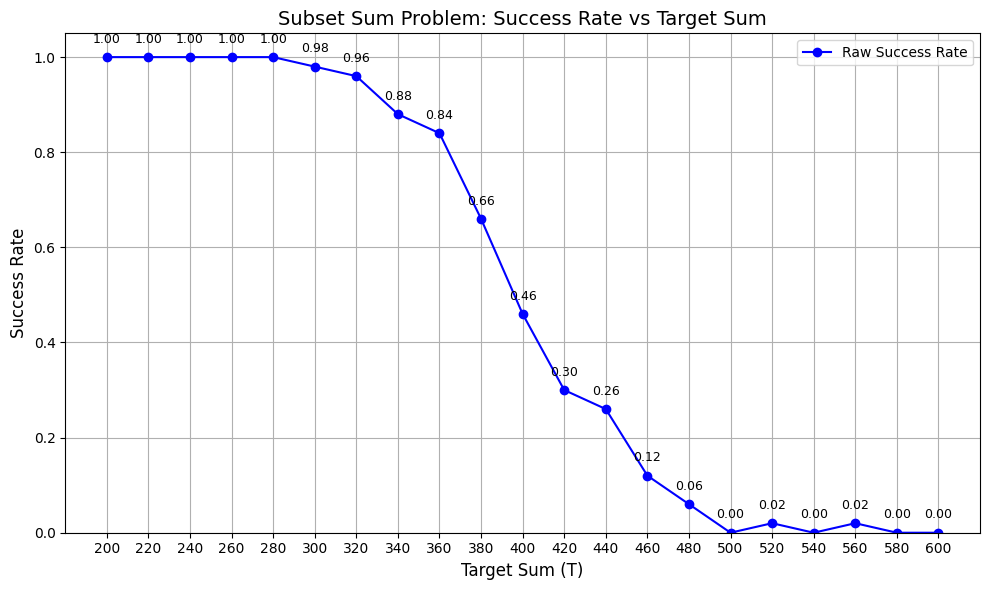

Target Sums (X-axis): [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]
Success Rates (Y-axis): [1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.96, 0.88, 0.84, 0.66, 0.46, 0.3, 0.26, 0.12, 0.06, 0.0, 0.02, 0.0, 0.02, 0.0, 0.0]


In [ ]:
# Does Transformative Preprocessing Trigger Accelerated
# Phase Transition in Complex Systems?
#
# Keunsoo Yoon (austiny@gatech.edu, austiny@snu.ac.kr)
#
# https://allthingsareP.com
#
# Figure 4
#
# The basic subset structure used as a foundation for transformation.
# This initial structure reveals latent solvability features even before additional processing.
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
import random
import matplotlib.pyplot as plt

# --- 1. Experimental Configuration ---
# A fixed seed is set to ensure that the same pseudo-random sequence is generated
# on every run, guaranteeing the reproducibility of the experimental results.
random.seed(42)

# Define key parameters for the experiment to generate problem instances.
# These parameters directly influence the complexity and solvability landscape.
ARRAY_SIZE = 20          # N: The number of elements in each problem instance array.
ELEMENT_MAX = 40         # R: The maximum integer value for each element (values are in the range [1, R]).
NUM_TRIALS = 50          # M: The number of random problem instances to test for each target sum.
T_RANGE = range(200, 601, 20)  # T_min to T_max: The range of target sums to be tested (the x-axis of the plot).

# --- 2. Data Collection and Experiment Execution ---
# A list to store the measured success rate for each target sum in T_RANGE.
success_rates = []

# Main experimental loop: iterate through each target sum T in the predefined range.
for T in T_RANGE:
    success_count = 0

    # Inner loop: run the experiment for a fixed number of trials to get a statistically
    # significant success rate for the current target sum T.
    for _ in range(NUM_TRIALS):
        # Generate a random problem instance (an array of integers).
        arr = [random.randint(1, ELEMENT_MAX) for _ in range(ARRAY_SIZE)]

        # Dynamic Programming approach to solve the Subset Sum problem.
        # A set 'dp' is used to efficiently track all possible subset sums that can be formed.
        dp = {0}

        # Iterate through each number in the generated array.
        for num in arr:
            # Create a new set to store the updated reachable sums to avoid
            # modifying the set while iterating over it.
            new_dp = set(dp)
            for prev_sum in dp:
                if prev_sum + num <= T:
                    new_dp.add(prev_sum + num)
            # Update the set of reachable sums for the next iteration.
            dp = new_dp

        # Check if the target sum T is present in the set of reachable sums.
        if T in dp:
            success_count += 1

    # Calculate the success rate (probability of a solution existing) for the current T.
    success_rate = success_count / NUM_TRIALS
    success_rates.append(success_rate)

# --- 3. Visualization of Results ---
# Initialize a new figure for the plot with a specified size.
plt.figure(figsize=(10, 6))

# Plot the raw experimental data points, showing the success rate as a function of the target sum.
plt.plot(T_RANGE, success_rates, marker='o', color='blue', label='Raw Success Rate')

# Set the title and axis labels for clear interpretation.
plt.title('Subset Sum Problem: Success Rate vs Target Sum', fontsize=14)
plt.xlabel('Target Sum (T)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1.05)  # Set the y-axis limit for a clear view of success rates (0 to 1).
plt.grid(True)     # Enable the grid for better readability of the data points.

# Customize the x-axis ticks to match the T_RANGE for precise data alignment.
plt.xticks(list(T_RANGE))

# Add a text label for each data point to display its exact success rate.
for x, y in zip(T_RANGE, success_rates):
    plt.text(x, y + 0.03, f'{y:.2f}', ha='center', fontsize=9)

# Display the legend to identify the plotted line.
plt.legend()
plt.tight_layout() # Adjust plot parameters for a tight layout.
plt.show() # Display the final plot.

# --- 4. Reporting Raw Data ---
# Print the collected data to the console for direct reporting in the paper or for debugging.
print("Target Sums (X-axis):", list(T_RANGE))
print("Success Rates (Y-axis):", success_rates)



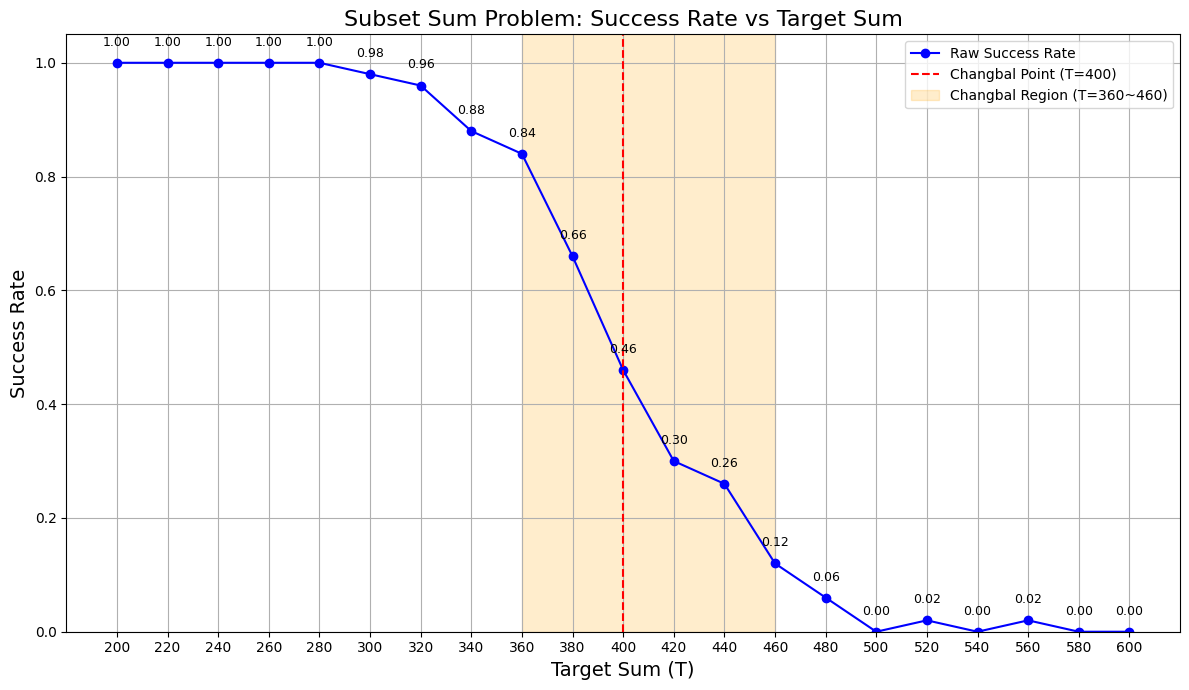

In [ ]:
#
# Figure 5
#
# Observed emergence curve (Changbal Curve) from the unprocessed subset structure. Even without transformation,
#a critical transition emerges, indicating latent solvability thresholds.
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
import random
import matplotlib.pyplot as plt

# --- 1. Experimental Configuration and Reproducibility ---
# A fixed seed is set to ensure that the same pseudo-random sequence is generated
# on every run, guaranteeing the reproducibility of the experimental results.
random.seed(42)

# Define key parameters for generating problem instances.
# These parameters directly influence the complexity and solvability landscape.
ARRAY_SIZE = 20          # N: The number of elements in each problem instance array.
ELEMENT_MAX = 40         # R: The maximum integer value for each element (range: [1, R]).
NUM_TRIALS = 50          # M: The number of random instances to test for each target sum T.
T_RANGE = range(200, 601, 20)  # T_min to T_max: The range of target sums to be tested (x-axis).

# --- 2. Data Collection and Experiment Execution ---
# A list to store the measured success rate for each target sum in T_RANGE.
success_rates = []

# Iterate through the range of target sums to conduct the main experiment.
for T in T_RANGE:
    success_count = 0

    # Run a fixed number of trials to obtain a statistically meaningful success rate.
    for _ in range(NUM_TRIALS):
        # Generate a random problem instance (an array of integers).
        arr = [random.randint(1, ELEMENT_MAX) for _ in range(ARRAY_SIZE)]

        # Dynamic Programming approach to solve the Subset Sum problem.
        # A set 'dp' efficiently tracks all possible subset sums that can be formed.
        dp = {0}

        # Iterate through each number in the generated array.
        for num in arr:
            # Create a new set to store the updated reachable sums to avoid
            # modifying the set while iterating over it.
            next_dp = set(dp)
            for prev_sum in dp:
                # Add the new sum to the set if it does not exceed the target T.
                if prev_sum + num <= T:
                    next_dp.add(prev_sum + num)
            # Update the set for the next iteration.
            dp = next_dp

        # Check if the target sum T is present in the set of reachable sums.
        if T in dp:
            success_count += 1

    # Calculate the success rate (probability of a solution existing) for the current T.
    success_rate = success_count / NUM_TRIALS
    success_rates.append(success_rate)

# --- 3. Visualization and Analysis of Results ---
# Initialize a new figure for the plot.
plt.figure(figsize=(12, 7))

# Plot the raw experimental data points, showing the success rate as a function of the target sum.
plt.plot(T_RANGE, success_rates, marker='o', color='blue', label='Raw Success Rate')

# Add text labels for each data point to display its exact success rate.
for x, y in zip(T_RANGE, success_rates):
    plt.text(x, y + 0.03, f'{y:.2f}', ha='center', fontsize=9)

# Mark the 'Changbal Point' with a vertical dashed line.
plt.axvline(x=400, color='red', linestyle='--', label='Changbal Point (T=400)')
# Highlight the 'Changbal Region' with a shaded area.
plt.axvspan(360, 460, color='orange', alpha=0.2, label='Changbal Region (T=360~460)')

# Set the title and axis labels for clear interpretation.
plt.title('Subset Sum Problem: Success Rate vs Target Sum', fontsize=16)
plt.xlabel('Target Sum (T)', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(T_RANGE)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Running Raw Experiment...
Running Fourier Filtering Experiment...


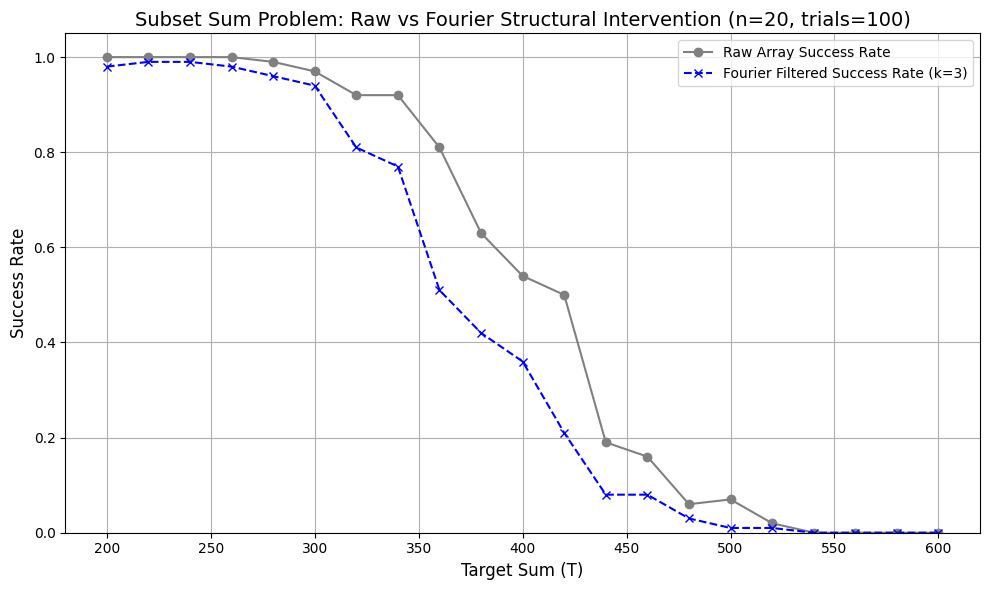


--- Experiment Results ---
Raw Array Success Rate: [1.   1.   1.   1.   0.99 0.97 0.92 0.92 0.81 0.63 0.54 0.5  0.19 0.16
 0.06 0.07 0.02 0.   0.   0.   0.  ]
Fourier Filtered Success Rate (k=3): [0.98 0.99 0.99 0.98 0.96 0.94 0.81 0.77 0.51 0.42 0.36 0.21 0.08 0.08
 0.03 0.01 0.01 0.   0.   0.   0.  ]


In [ ]:
#
# Figure 6
#
# Subset Sum success rate comparison between raw arrays and Fourier-filtered structures
# ($n=20$, trials=$100$, $K=3$ kept coefficients).
# Fourier smoothing eliminates high-frequency noise in the problem structure, resulting in
# a \emph{leftward} shift of the solvability transition curve and a more stable emergence pattern.
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# --- Experiment Configuration ---
# Fix the seed for reproducibility
np.random.seed(42)

# Size of the array to be generated randomly
array_size = 20
# Maximum value for elements in the array
element_max = 40
# Number of trials for each target sum (T)
num_trials = 100
# The range of target sums (T) to be tested
T_range = list(range(200, 601, 20))
# Fourier filter parameter
filter_k = 3

# --- 1. Raw Experiment Function ---
def run_raw_experiment():
    """
    Calculates the success rate of the subset sum problem using raw (unfiltered) arrays.
    """
    raw_rates = []
    for T in T_range:
        success_count = 0
        for _ in range(num_trials):
            # Generate a new random array for each trial
            arr = np.random.randint(1, element_max + 1, array_size)

            # Initialize a set for dynamic programming to store possible subset sums
            dp = set()
            dp.add(0)

            # Iterate through all elements of the current array
            for num in arr:
                # Add new sums that do not exceed T
                dp |= {prev_sum + num for prev_sum in dp if prev_sum + num <= T}

            # Check if the target sum T is in the set of possible sums
            if T in dp:
                success_count += 1
        raw_rates.append(success_count / num_trials)
    return np.array(raw_rates)

# --- 2. Fourier-based Structural Intervention Function ---
def run_fourier_experiment():
    """
    Calculates the success rate of the subset sum problem using arrays smoothed by a Fourier filter.
    """
    rates = []
    for T in T_range:
        success_count = 0
        for _ in range(num_trials):
            # Structural smoothing: Generate an array to which Fourier transform can be applied
            arr = np.random.randint(1, element_max + 1, array_size)
            fft_values = fft(arr)

            # Low-pass filtering: Remove high-frequency components to smooth the signal
            filtered_fft = fft_values.copy()
            # Set high-frequency components from filter_k onwards to zero
            filtered_fft[filter_k:] = 0

            # Reconstruct the smoothed array using inverse Fourier transform
            smoothed_arr = np.real(ifft(filtered_fft))

            # Adjust the element range back to [1, element_max] and convert to integer type
            smoothed_arr = np.clip(smoothed_arr, 1, element_max).astype(int)

            # Solve the subset sum problem with the smoothed array
            dp = set()
            dp.add(0)
            for num in smoothed_arr:
                dp |= {prev_sum + num for prev_sum in dp if prev_sum + num <= T}

            # Check if the target sum T is in the set
            if T in dp:
                success_count += 1
        rates.append(success_count / num_trials)
    return np.array(rates)

# === Run the Experiment ===
print("Running Raw Experiment...")
raw_result = run_raw_experiment()
print("Running Fourier Filtering Experiment...")
fourier_result = run_fourier_experiment()

# === Visualization ===
plt.figure(figsize=(10, 6))
plt.plot(T_range, raw_result, marker='o', color='gray', label='Raw Array Success Rate')
plt.plot(T_range, fourier_result, marker='x', linestyle='--', color='blue', label=f'Fourier Filtered Success Rate (k={filter_k})')

plt.title(f'Subset Sum Problem: Raw vs Fourier Structural Intervention (n={array_size}, trials={num_trials})', fontsize=14)
plt.xlabel('Target Sum (T)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print results
print("\n--- Experiment Results ---")
print("Raw Array Success Rate:", raw_result)
print(f"Fourier Filtered Success Rate (k={filter_k}):", fourier_result)


Laplace: 100%|██████████| 21/21 [00:02<00:00,  8.35it/s]


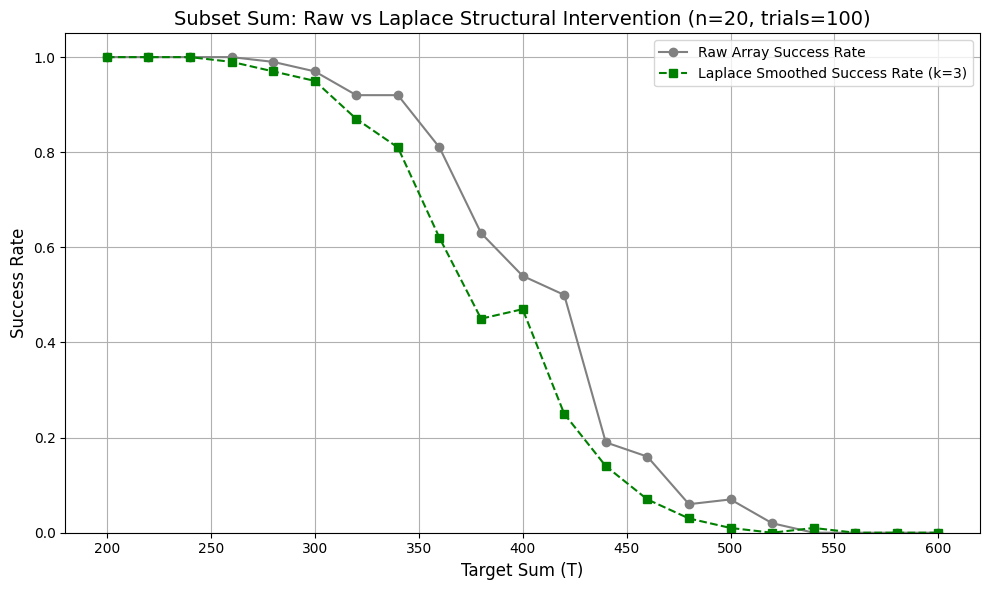

In [ ]:
#
# Figure 7
#
# Subset Sum: Raw vs.\ Laplacian Mask ($n{=}20$, trials$=100$).
# The mask induces small, edge-focused modifications.
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
# --- Library Imports ---
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- 1. Experimental Configuration and Reproducibility ---
# A fixed seed is set for both the 'random' and 'numpy' libraries to ensure
# that the same sequence of pseudo-random numbers is generated on every run,
# which is critical for the reproducibility of experimental results.
np.random.seed(42)

# Define key parameters for generating problem instances.
array_size = 20          # N: The number of elements in each problem instance array.
element_max = 40         # R: The maximum integer value for each element (range: [1, R]).
num_trials = 100         # M: The number of random instances to test for each target sum T.
T_range = list(range(200, 601, 20))  # T_min to T_max: The range of target sums to be tested (x-axis).

# Laplace smoothing parameter: The number of times local averaging is applied.
# A higher 'k' value results in a more significant smoothing effect, simulating a
# stronger diffusion of structural properties.
laplace_k = 3

# --- 2. Raw Experiment Function ---
def run_raw_experiment():
    """
    Executes the experiment on the original, unprocessed problem instances.
    It measures the success rate of the Subset Sum problem using a standard
    dynamic programming approach. This serves as the baseline for comparison.
    """
    raw_rates = []
    # Use tqdm for a progress bar, which is useful for long-running experiments.
    for T in tqdm(T_range, desc="Raw"):
        success_count = 0
        for _ in range(num_trials):
            # Generate a random array of integers for the Subset Sum problem.
            arr = np.random.randint(1, element_max + 1, array_size)

            # Dynamic programming approach to find all possible subset sums.
            # A set is used for efficient lookup and insertion.
            dp = {0}
            for num in arr:
                # Efficiently update the set of reachable sums.
                dp |= {s + num for s in dp if s + num <= T}

            # Check if the target sum is in the set of reachable sums.
            if T in dp:
                success_count += 1
        raw_rates.append(success_count / num_trials)
    return np.array(raw_rates)

# --- 3. Laplace Preprocessing Experiment Function ---
def run_laplace_experiment():
    """
    Executes the experiment on problem instances that have been preprocessed
    with Laplace-inspired smoothing. It measures the change in success rate
    due to this structural intervention.
    """
    laplace_rates = []
    for T in tqdm(T_range, desc="Laplace"):
        success_count = 0
        for _ in range(num_trials):
            # Generate the initial raw array.
            arr = np.random.randint(1, element_max + 1, array_size)

            # --- Laplace Smoothing ---
            # This loop iteratively applies a local averaging filter.
            # It models a diffusion process, smoothing out local fluctuations
            # and revealing a more global structural trend.
            for _ in range(laplace_k):
                smoothed = arr.copy()
                for i in range(1, len(arr) - 1):
                    # Each element is replaced by the mean of its neighbors (including itself).
                    smoothed[i] = int(np.mean([arr[i - 1], arr[i], arr[i + 1]]))
                arr = smoothed

            # Ensure all values remain within the valid range after smoothing.
            arr = np.clip(arr, 1, element_max).astype(int)

            # Solve the preprocessed Subset Sum instance using dynamic programming.
            dp = {0}
            for num in arr:
                dp |= {s + num for s in dp if s + num <= T}

            if T in dp:
                success_count += 1
        laplace_rates.append(success_count / num_trials)
    return np.array(laplace_rates)

# --- 4. Main Execution and Visualization ---
# Run both the raw and Laplace preprocessing experiments to get results.
raw_result = run_raw_experiment()
laplace_result = run_laplace_experiment()

# Initialize the plot figure.
plt.figure(figsize=(10, 6))

# Plot the success rate of the raw instances as the baseline.
plt.plot(T_range, raw_result, marker='o', color='gray', label='Raw Array Success Rate')

# Plot the success rate of the Laplace-smoothed instances.
plt.plot(T_range, laplace_result, marker='s', linestyle='--', color='green', label=f'Laplace Smoothed Success Rate (k={laplace_k})')

# Set plot title and axis labels for academic presentation.
plt.title(f'Subset Sum: Raw vs Laplace Structural Intervention (n={array_size}, trials={num_trials})', fontsize=14)
plt.xlabel('Target Sum (T)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1.05)  # Set Y-axis to clearly show the 0 to 1 success rate range.
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Running Raw Experiment...


Raw: 100%|██████████| 21/21 [00:01<00:00, 10.68it/s]


Running Laplacian Mask Experiment...


Laplacian Mask: 100%|██████████| 21/21 [00:01<00:00, 12.79it/s]


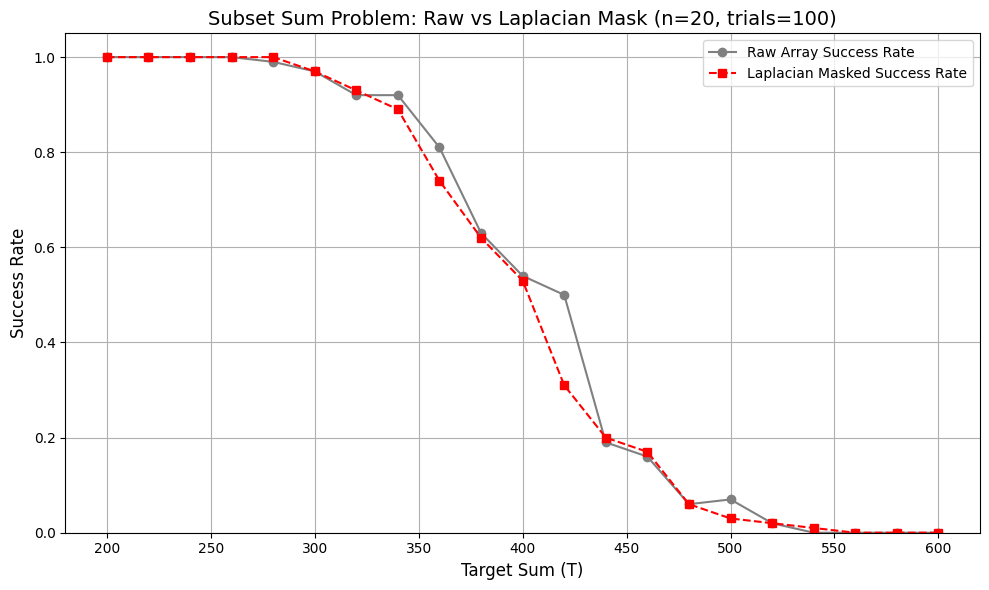


--- Experiment Results ---
Raw Array Success Rate: [1.   1.   1.   1.   0.99 0.97 0.92 0.92 0.81 0.63 0.54 0.5  0.19 0.16
 0.06 0.07 0.02 0.   0.   0.   0.  ]
Laplacian Mask Success Rate: [1.   1.   1.   1.   1.   0.97 0.93 0.89 0.74 0.62 0.53 0.31 0.2  0.17
 0.06 0.03 0.02 0.01 0.   0.   0.  ]


In [ ]:
#
# Figure 8
#
# Subset Sum: Raw vs.\ Laplace Smoothing ($n{=}20$, trials$=100$, $k{=}3$).
# Smoothing yields an earlier and wider critical region.
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
# --- Library Imports ---
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- 1. Experimental Configuration and Reproducibility ---
# A fixed seed is set for the 'numpy' library to ensure that the same sequence of
# pseudo-random numbers is generated on every run. This is crucial for the
# reproducibility of experimental results.
np.random.seed(42)

# Define key parameters for generating problem instances.
array_size = 20          # N: The number of elements in each problem instance array.
element_max = 40         # R: The maximum integer value for each element (range: [1, R]).
num_trials = 100         # M: The number of random instances to test for each target sum T.
T_range = list(range(200, 601, 20))  # T_min to T_max: The range of target sums (x-axis).

# Laplacian mask parameter: a scaling factor to control the strength of the filter.
# This factor determines how much the local structural changes are emphasized.
laplacian_strength = 0.5

# --- 2. Raw Experiment Function ---
def run_raw_experiment():
    """
    Executes the experiment on the original, unprocessed problem instances.
    It calculates the success rate of the Subset Sum problem using a standard
    dynamic programming approach. This provides the baseline for comparison.
    """
    raw_rates = []
    # Use tqdm for a progress bar, which is useful for tracking progress.
    for T in tqdm(T_range, desc="Raw"):
        success_count = 0
        for _ in range(num_trials):
            # Generate a new random array for each trial.
            arr = np.random.randint(1, element_max + 1, array_size)

            # Dynamic programming approach to find all possible subset sums.
            # A set is used for efficient storage and lookup.
            dp = {0}
            for num in arr:
                # Efficiently update the set of reachable sums without exceeding T.
                dp |= {prev_sum + num for prev_sum in dp if prev_sum + num <= T}

            # Check if the target sum T is present in the set of reachable sums.
            if T in dp:
                success_count += 1
        raw_rates.append(success_count / num_trials)
    return np.array(raw_rates)

# --- 3. Laplacian Mask Experiment Function ---
def run_laplacian_mask_experiment():
    """
    Calculates the success rate of the subset sum problem using arrays
    that have been preprocessed with a Laplacian mask filter. This
    filter is a discrete second-order derivative that detects rapid
    changes in the array's values.
    """
    rates = []
    for T in tqdm(T_range, desc="Laplacian Mask"):
        success_count = 0
        for _ in range(num_trials):
            # Generate the initial raw array.
            arr = np.random.randint(1, element_max + 1, array_size)

            # --- Laplacian Mask Filter ---
            # Compute a discrete approximation of the second derivative.
            # This highlights local fluctuations and structural boundaries.
            laplacian_arr = np.zeros_like(arr, dtype=float)
            # The mask is a [1, -2, 1] kernel applied to the array.
            laplacian_arr[1:-1] = arr[2:] - 2 * arr[1:-1] + arr[:-2]

            # Enhance the original array by adding the Laplacian output,
            # scaled by the 'laplacian_strength' parameter. This amplifies
            # the local variations detected by the mask.
            filtered_arr = arr + laplacian_strength * laplacian_arr

            # Ensure the filtered array elements remain within the valid range
            # and convert them back to integers.
            filtered_arr = np.clip(filtered_arr, 1, element_max).astype(int)

            # Solve the preprocessed Subset Sum instance using dynamic programming.
            dp = {0}
            for num in filtered_arr:
                dp |= {prev_sum + num for prev_sum in dp if prev_sum + num <= T}

            if T in dp:
                success_count += 1
        rates.append(success_count / num_trials)
    return np.array(rates)

# --- 4. Main Execution and Visualization ---
# Run both the raw and Laplacian mask preprocessing experiments.
print("Running Raw Experiment...")
raw_result = run_raw_experiment()
print("Running Laplacian Mask Experiment...")
laplacian_mask_result = run_laplacian_mask_experiment()

# Initialize the plot figure with a white background.
plt.figure(figsize=(10, 6))

# Plot the success rate of the raw instances as the baseline.
plt.plot(T_range, raw_result, marker='o', color='gray', label='Raw Array Success Rate')

# Plot the success rate of the Laplacian-masked instances.
plt.plot(T_range, laplacian_mask_result, marker='s', linestyle='--', color='red', label=f'Laplacian Masked Success Rate')

# Set plot title and axis labels for academic presentation.
plt.title(f'Subset Sum Problem: Raw vs Laplacian Mask (n={array_size}, trials={num_trials})', fontsize=14)
plt.xlabel('Target Sum (T)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1.05)  # Set Y-axis to clearly show the 0 to 1 success rate range.
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the final results for direct reporting.
print("\n--- Experiment Results ---")
print("Raw Array Success Rate:", raw_result)
print(f"Laplacian Mask Success Rate:", laplacian_mask_result)


Running Raw Experiment...


Raw: 100%|██████████| 21/21 [00:01<00:00, 11.72it/s]


Running Entropy Experiment...


Entropy: 100%|██████████| 21/21 [00:03<00:00,  6.90it/s]


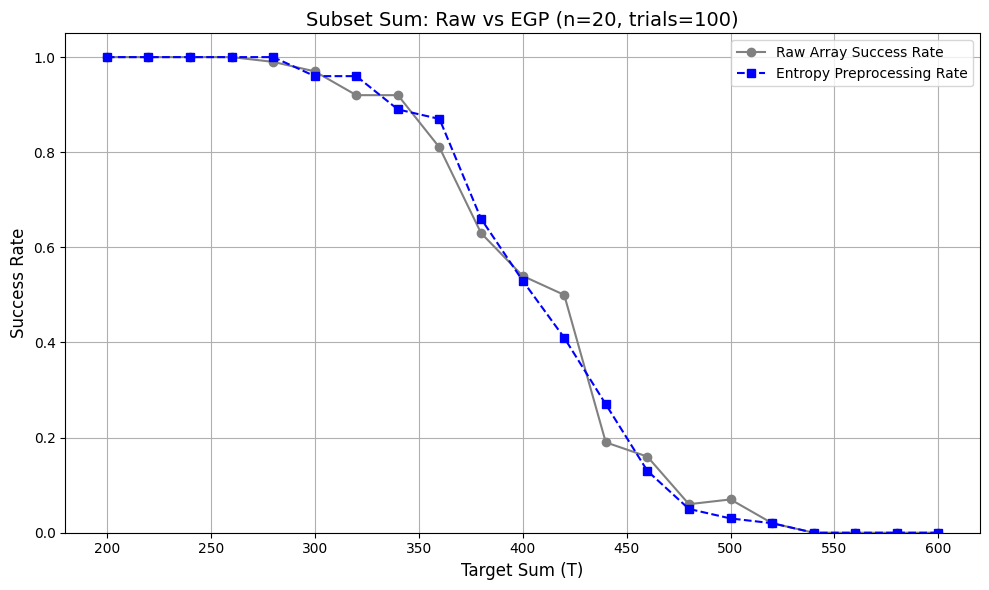


--- Experiment Results ---
Raw Array Success Rate: [1.   1.   1.   1.   0.99 0.97 0.92 0.92 0.81 0.63 0.54 0.5  0.19 0.16
 0.06 0.07 0.02 0.   0.   0.   0.  ]
EGP Rate: [1.   1.   1.   1.   1.   0.96 0.96 0.89 0.87 0.66 0.53 0.41 0.27 0.13
 0.05 0.03 0.02 0.   0.   0.   0.  ]


In [ ]:
#
# Figure 9
#
# Subset Sum: Raw vs.\ EGP (entropy-guided reweighting; $n{=}20$, trials$=100$).
# EGP emphasizes dispersion over dominance, altering the transition profile.
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
# --- Library Imports ---
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import entropy

# --- 1. Experimental Configuration and Reproducibility ---
# A fixed seed is set for the 'numpy' library to ensure that the same sequence of
# pseudo-random numbers is generated on every run. This is crucial for the
# reproducibility of experimental results.
np.random.seed(42)

# Define key parameters for generating problem instances.
array_size = 20          # N: The number of elements in each problem instance array.
element_max = 40         # R: The maximum integer value for each element (range: [1, R]).
num_trials = 100         # M: The number of random instances to test for each target sum T.
T_range = list(range(200, 601, 20))  # T_min to T_max: The range of target sums (x-axis).

# --- 2. Raw Experiment Function ---
def run_raw_experiment():
    """
    Executes the experiment on the original, unprocessed problem instances.
    It calculates the success rate of the Subset Sum problem using a standard
    dynamic programming approach. This provides the baseline for comparison.
    """
    raw_rates = []
    # Use tqdm for a progress bar, which is useful for tracking progress.
    for T in tqdm(T_range, desc="Raw"):
        success_count = 0
        for _ in range(num_trials):
            # Generate a new random array for each trial.
            arr = np.random.randint(1, element_max + 1, array_size)

            # Dynamic programming approach to find all possible subset sums.
            # A set is used for efficient storage and lookup.
            dp = {0}
            for num in arr:
                # Efficiently update the set of reachable sums without exceeding T.
                dp |= {prev_sum + num for prev_sum in dp if prev_sum + num <= T}

            # Check if the target sum T is present in the set of reachable sums.
            if T in dp:
                success_count += 1
        raw_rates.append(success_count / num_trials)
    return np.array(raw_rates)

# --- 3. Entropy Guided Preprocessing Experiment Function ---
def run_entropy_experiment():
    """
    Calculates the success rate of the subset sum problem using arrays
    that have been preprocessed with a entropy guided method. This method
    re-samples the array based on a distribution derived from its entropy, aiming
    to create a more ordered or less disordered problem structure.
    """
    thermo_rates = []
    for T in tqdm(T_range, desc="Entropy"):
        success_count = 0
        for _ in range(num_trials):
            # Generate a new random array.
            arr = np.random.randint(1, element_max + 1, array_size)

            # --- Entropy Guided Preprocessing ---
            # 1. Calculate a histogram to represent the distribution of elements.
            hist, _ = np.histogram(arr, bins=np.arange(1, element_max + 2))

            # 2. Normalize the histogram to get a probability distribution.
            if np.sum(hist) > 0:
                p = hist / np.sum(hist)
            else:
                # Handle cases where histogram is all zeros by creating a uniform distribution.
                p = np.ones(element_max) / element_max

            # 3. Calculate the entropy of the distribution.
            arr_entropy = entropy(p)

            # 4. Use the entropy to guide the re-sampling process.
            # The 'skew factor' is designed to reduce the entropy by favoring
            # values that are already more common.
            normalized_entropy = arr_entropy / np.log(element_max + 1)
            skew_factor = 1.0 - normalized_entropy

            # Create a new, less disordered probability distribution for resampling.
            # This skews the distribution towards values that were more frequent
            # in the original array.
            resample_dist = p + (1-p) * skew_factor
            resample_dist = resample_dist / np.sum(resample_dist)

            # 5. Resample a new array from this less disordered distribution.
            # The range for resampling is now corrected to match the bins.
            processed_arr = np.random.choice(
                np.arange(1, element_max + 1),
                size=array_size,
                p=resample_dist
            )

            # Solve the subset sum problem with the processed array.
            dp = {0}
            for num in processed_arr:
                dp |= {s + num for s in dp if s + num <= T}

            if T in dp:
                success_count += 1
        thermo_rates.append(success_count / num_trials)
    return np.array(thermo_rates)

# --- 4. Main Execution and Visualization ---
# Run both the raw and entropy guided preprocessing experiments.
print("Running Raw Experiment...")
raw_result = run_raw_experiment()
print("Running Entropy Experiment...")
thermo_result = run_entropy_experiment()

# Initialize the plot figure with a white background.
plt.figure(figsize=(10, 6))

# Plot the success rate of the raw instances as the baseline.
plt.plot(T_range, raw_result, marker='o', color='gray', label='Raw Array Success Rate')

# Plot the success rate of the entropy-preprocessed instances.
plt.plot(T_range, thermo_result, marker='s', linestyle='--', color='blue', label='EGP Rate')

# Set plot title and axis labels for academic presentation.
plt.title(f'Subset Sum: Raw vs EGP (n={array_size}, trials={num_trials})', fontsize=14)
plt.xlabel('Target Sum (T)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1.05)  # Set Y-axis to clearly show the 0 to 1 success rate range.
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the final results for direct reporting.
print("\n--- Experiment Results ---")
print("Raw Array Success Rate:", raw_result)
print("EGP Rate:", thermo_result)


Entropy: 100%|██████████| 21/21 [00:00<00:00, 96.25it/s] 


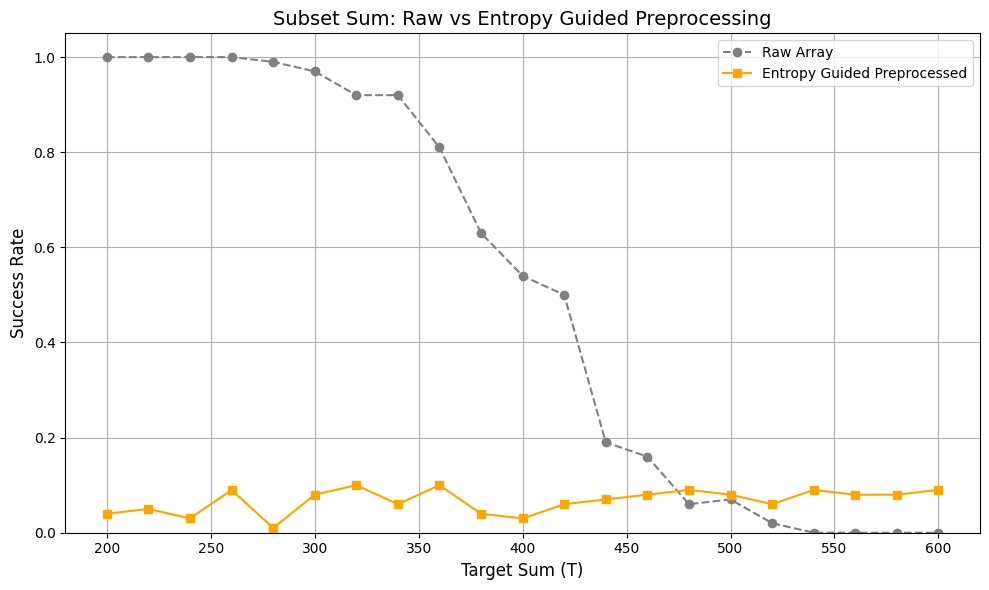

In [ ]:
#
# Figure 10
#
# Subset Sum: Raw vs.\ EGP (cumulative energy cutoff; $n{=}20$, trials$=100$).
# Lower-energy truncation reduces solvability while clarifying the boundary.
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
#
# --- Library Imports ---
# This command is for environments like Google Colab to ensure necessary libraries are installed.
# !pip install numpy matplotlib tqdm
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- 1. Experiment Configuration and Reproducibility ---
# A fixed seed is set for the 'numpy' library to ensure that the same sequence of
# pseudo-random numbers is generated on every run. This is crucial for the
# reproducibility of experimental results.
np.random.seed(42)

# Define key parameters for generating problem instances.
array_size = 20          # N: The number of elements in each problem instance array.
element_max = 40         # R: The maximum integer value for each element (range: [1, R]).
num_trials = 100         # M: The number of random instances to test for each target sum T.
T_range = list(range(200, 601, 20))  # T_min to T_max: The range of target sums (x-axis).

# --- 2. Raw Experiment Function (DO NOT MODIFY) ---
def run_raw_experiment():
    """
    Executes the experiment on the original, unprocessed problem instances.
    It calculates the success rate of the Subset Sum problem using a standard
    dynamic programming approach. This provides the baseline for comparison.
    """
    raw_rates = []
    # Use tqdm for a progress bar, which is useful for tracking progress.
    for T in tqdm(T_range, desc="Raw"):
        success_count = 0
        for _ in range(num_trials):
            # Generate a new random array for each trial.
            arr = np.random.randint(1, element_max + 1, array_size)

            # Dynamic programming approach to find all possible subset sums.
            # A set is used for efficient storage and lookup.
            dp = {0}
            for num in arr:
                # Efficiently update the set of reachable sums without exceeding T.
                dp |= {s + num for s in dp if s + num <= T}

            # Check if the target sum T is present in the set of reachable sums.
            if T in dp:
                success_count += 1
        raw_rates.append(success_count / num_trials)
    return np.array(raw_rates)

# --- 3. Entropy Guided Preprocessing Function (Softmax-inspired) ---
def run_entropy_experiment(temperature=1.5):
    """
    Calculates the success rate of the subset sum problem using arrays
    that have been preprocessed with a softmax-inspired Entropy method.
    The method transforms the array to emphasize larger values, which can
    change the problem's solvability landscape.
    """
    thermo_rates = []
    # Use tqdm for a progress bar for this experiment as well.
    for T in tqdm(T_range, desc="Entropy"):
        success_count = 0
        for _ in range(num_trials):
            # Generate a new random array for this trial.
            arr = np.random.randint(1, element_max + 1, array_size)

            # --- Thermodynamic Preprocessing ---
            # 1. Apply a softmax-inspired transformation. The 'temperature' parameter
            # controls the sharpness of the distribution. A lower temperature
            # makes larger values stand out more significantly.
            exp_arr = np.exp(arr / temperature)

            # 2. Normalize the values to create a probability distribution.
            prob_arr = exp_arr / np.sum(exp_arr)

            # 3. Scale the probability distribution back to the original range of values.
            # This step generates a new array where larger original values
            # are more likely to be represented by larger scaled values.
            scaled_arr = np.round(prob_arr * array_size * element_max).astype(int)

            # Solve the subset sum problem with the preprocessed (scaled) array.
            dp = {0}
            for num in scaled_arr:
                dp |= {s + num for s in dp if s + num <= T}

            # Check for a solution.
            if T in dp:
                success_count += 1
        thermo_rates.append(success_count / num_trials)
    return np.array(thermo_rates)

# --- 4. Main Execution and Visualization ---
# Run both the raw and thermodynamic preprocessing experiments.
raw_result = run_raw_experiment()
thermo_result = run_entropy_experiment()

# Initialize the plot figure with a white background.
plt.figure(figsize=(10, 6))

# Plot the success rate of the raw instances as the baseline.
plt.plot(T_range, raw_result, marker='o', linestyle='--', color='gray', label='Raw Array')

# Plot the success rate of the thermodynamic-preprocessed instances.
plt.plot(T_range, thermo_result, marker='s', linestyle='-', color='orange', label='Entropy Guided Preprocessed')

# Set plot title and axis labels for clear presentation.
plt.title('Subset Sum: Raw vs Entropy Guided Preprocessing', fontsize=14)
plt.xlabel('Target Sum (T)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1.05)  # Set Y-axis to clearly show the 0 to 1 success rate range.
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for pypblib: filename=pypblib-0.0.4-cp312-cp312-linux_x86_64.whl size=2973446 sha256=bdeeaa670636d9d6f4ffa02fb9972272f110f9bc497f586ee3e877d4da516044
  Stored in directory: /root/.cache/pip/wheels/f9/c3/c2/4b30af331ac791dac939900c63fd0fb7911f82d53d4ffbaec1
  Created wheel for python-sat: filename=python_sat-1.8.dev20-cp312-cp312-linux_x86_64.whl size=2550648 sha256=c35fbae0574c02d359e9456024f116747bd605b7e1216bcd11aa413d0fc111af
  Stored in directory: /root/.cache/pip/wheels/26/10/d6/dd045e9457b4a8722e0de29f82b32ced80c73de87e1589248e
Successfully built pypblib python-sat


Running for n=60: 100%|██████████| 21/21 [00:27<00:00,  1.31s/it]


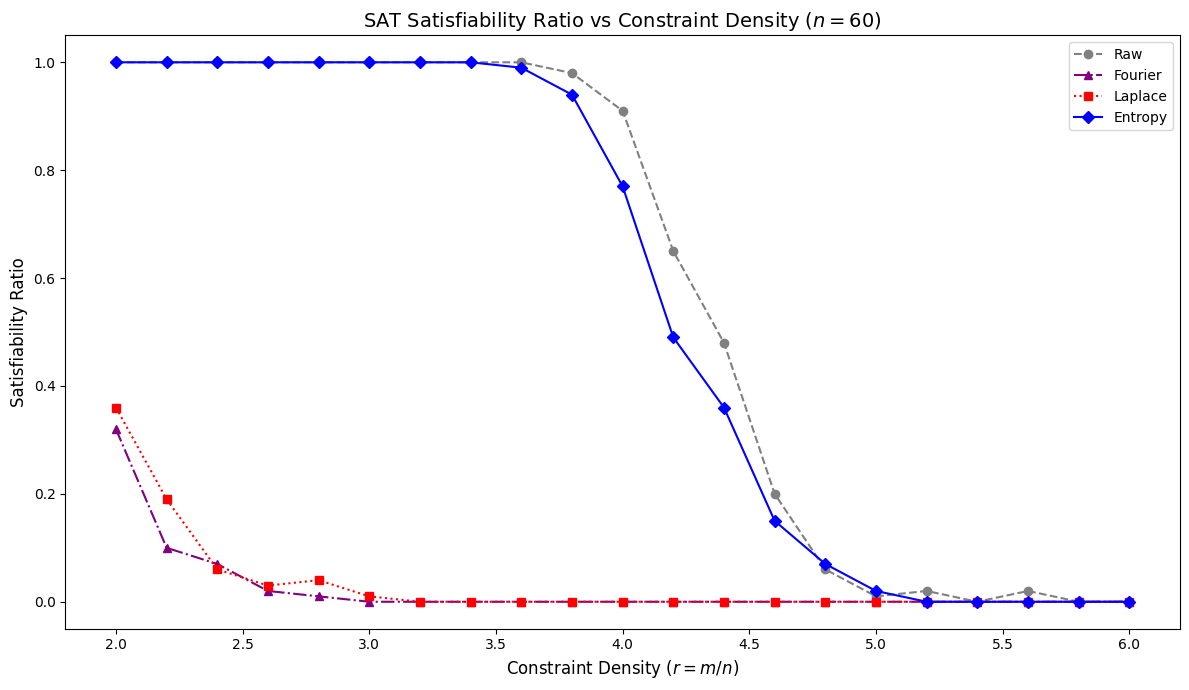

In [ ]:
#
# Figure 11
#
# SAT Satisfiability Ratio vs Constraint Density ($n=60$)
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
#
# --- Install Required Packages ---
# This command ensures the 'pysat' library is available. It must be run
# before any of the import statements to resolve the 'ModuleNotFoundError'.
# This is a classic solution for dependency management in environments like Colab.
!pip install python-sat[pblib,aiger]

# --- Import Required Packages ---
# Import all necessary libraries for the experiment.
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from pysat.solvers import Glucose3
from tqdm import tqdm
from scipy.stats import entropy
import copy

# --- 1. Experimental Configuration and Reproducibility ---
# A fixed seed is set for both the 'random' and 'numpy' libraries
# to ensure that the same sequence of pseudo-random numbers is generated
# on every run, guaranteeing the reproducibility of the experimental results.
random.seed(42)
np.random.seed(42)

# Define key parameters for the experiment.
# These parameters are chosen to investigate the phase transition region of the 3-SAT problem.
n = 60  # The number of boolean variables. A classic size for observing phase transitions.
# Constraint density (r = m/n) values to be tested. The density is the ratio of clauses to variables.
r_values = np.arange(2.0, 6.1, 0.2)
# Number of random SAT instances generated for each (n, r) setting.
instances_per_setting = 100

# Dictionary to store the experimental results for each method.
# It will store the satisfiability ratio and average solving time.
results = {
    'Raw': {'sat_ratio': [], 'avg_time': []},
    'Fourier': {'sat_ratio': [], 'avg_time': []},
    'Laplace': {'sat_ratio': [], 'avg_time': []},
    'Entropy': {'sat_ratio': [], 'avg_time': []}
}

# --- 2. Preprocessing Functions ---

def apply_fourier_low_pass(clauses):
    """
    Applies a low-pass Fourier filter to the SAT clauses.
    This method reinterprets the problem instance as a signal and uses
    frequency-domain analysis to smooth out high-frequency (noisy or local)
    components, aiming to reveal the underlying macroscopic structure.

    Args:
        clauses (list): A list of clauses, where each clause is a list of literals.

    Returns:
        list: The preprocessed list of clauses.
    """
    if not clauses:
        return []

    # Flatten the clauses into a single list of literals, separating signs.
    flattened_literals = [lit for clause in clauses for lit in clause]
    signs = np.array([np.sign(lit) for lit in flattened_literals])
    abs_values = np.array([abs(lit) for lit in flattened_literals], dtype=float)

    # Perform a Fast Fourier Transform (FFT) on the absolute literal values.
    fft_vals = np.fft.fft(abs_values)

    # Create a simple low-pass filter mask. This filter keeps only the lowest 10%
    # of frequency components, effectively removing high-frequency noise.
    cutoff = int(len(fft_vals) * 0.1)
    filter_mask = np.zeros_like(fft_vals)
    filter_mask[:cutoff] = 1
    filter_mask[-cutoff:] = 1  # The filter is symmetric for real-valued signals.

    # Apply the mask and perform the inverse Fourier transform (IFFT).
    filtered_fft_vals = fft_vals * filter_mask
    smoothed_abs_values = np.real(np.fft.ifft(filtered_fft_vals))

    # Reconstruct the clauses by rounding the smoothed values and re-applying
    # the original signs. Values are clipped to stay within the valid range [1, n].
    reconstructed_literals = np.round(np.clip(smoothed_abs_values, 1, n)).astype(int)
    reconstructed_literals = [val * sign for val, sign in zip(reconstructed_literals, signs)]

    # Re-assemble the flattened list of literals into clauses.
    new_clauses = []
    literal_idx = 0
    for clause in clauses:
        new_clause = []
        for _ in clause:
            new_clause.append(reconstructed_literals[literal_idx])
            literal_idx += 1
        new_clauses.append(new_clause)

    return new_clauses

def apply_laplace_smoothing(clauses, iterations=3):
    """
    Applies an iterative local averaging (Laplace-inspired smoothing)
    to the SAT clauses. This method models the problem as a discrete
    field and applies a diffusion-like process to smooth out local
    variations, thereby highlighting more global structural trends.

    Args:
        clauses (list): A list of clauses, where each clause is a list of literals.
        iterations (int): The number of times to apply the smoothing filter.

    Returns:
        list: The preprocessed list of clauses.
    """
    if not clauses:
        return []

    # Flatten the clauses and handle signs separately.
    flattened_literals = [lit for clause in clauses for lit in clause]
    signs = np.array([np.sign(lit) for lit in flattened_literals])
    arr = np.array([abs(lit) for lit in flattened_literals], dtype=float)

    # Apply smoothing repeatedly for a fixed number of iterations.
    for _ in range(iterations):
        smoothed_arr = arr.copy()
        for i in range(1, len(arr) - 1):
            # Each element is replaced by the average of its local neighbors,
            # analogous to a discretized Laplacian operator.
            smoothed_arr[i] = (arr[i-1] + arr[i] + arr[i+1]) / 3
        arr = smoothed_arr

    # Reconstruct the clauses with the smoothed values.
    reconstructed_literals = np.round(np.clip(arr, 1, n)).astype(int)
    reconstructed_literals = [val * sign for val, sign in zip(reconstructed_literals, signs)]

    # Re-assemble the flattened list of literals into clauses.
    new_clauses = []
    literal_idx = 0
    for clause in clauses:
        new_clause = []
        for _ in clause:
            new_clause.append(reconstructed_literals[literal_idx])
            literal_idx += 1
        new_clauses.append(new_clause)

    return new_clauses

def apply_entropy_resampling(clauses):
    """
    Applies an entropy-guided resampling method to the SAT clauses.
    This method is inspired by thermodynamic principles, where entropy measures
    the disorder of a system. By reducing the entropy of the literal distribution,
    this preprocessing aims to make the problem structure more regular and less random.

    Args:
        clauses (list): A list of clauses, where each clause is a list of literals.

    Returns:
        list: The preprocessed list of clauses.
    """
    if not clauses:
        return []

    # Flatten the clauses and handle signs separately.
    flattened_literals = [lit for clause in clauses for lit in clause]
    signs = np.array([np.sign(lit) for lit in flattened_literals])
    arr = np.array([abs(lit) for lit in flattened_literals])

    # Calculate the histogram and probability distribution of literals.
    hist, _ = np.histogram(arr, bins=np.arange(1, n + 2))
    p = hist / np.sum(hist)

    # Calculate the Shannon entropy of the literal distribution.
    arr_entropy = entropy(p)
    # Normalize the entropy for a defined range.
    normalized_entropy = arr_entropy / np.log(n + 1) if n > 0 else 0
    # The skew factor is based on the normalized entropy.
    skew_factor = 1.0 - normalized_entropy
    # Create a new, skewed probability distribution that favors less-random values.
    resample_dist = p + (1-p) * skew_factor
    resample_dist = resample_dist / np.sum(resample_dist)

    # Resample literals from the new, regularized distribution.
    reconstructed_literals = np.random.choice(
        np.arange(1, n + 1),
        size=len(flattened_literals),
        p=resample_dist
    )

    reconstructed_literals = [val * sign for val, sign in zip(reconstructed_literals, signs)]

    # Re-assemble the flattened list of literals into clauses.
    new_clauses = []
    literal_idx = 0
    for clause in clauses:
        new_clause = []
        for _ in clause:
            new_clause.append(reconstructed_literals[literal_idx])
            literal_idx += 1
        new_clauses.append(new_clause)

    return new_clauses

# Function: Generate a random 3-SAT instance
def generate_3sat_instance(n, m):
    """
    Generates a random 3-SAT CNF instance with n variables and m clauses.
    This is a standard procedure for creating instances in the study of NP problems.

    Args:
        n (int): The number of variables.
        m (int): The number of clauses.

    Returns:
        list: A list of clauses representing the CNF formula.
    """
    clauses = []
    for _ in range(m):
        # Randomly sample 3 distinct variables.
        vars = random.sample(range(1, n + 1), 3)
        clause = []
        for v in vars:
            # Assign a random sign (positive or negative literal) to each variable.
            clause.append(-v if random.random() < 0.5 else v)
        clauses.append(clause)
    return clauses

# --- 3. Main Experimental Loop ---
# Iterate through each constraint density 'r' to explore the solvability landscape.
for r in tqdm(r_values, desc=f"Running for n={n}"):
    m = int(r * n)

    # Run the experiment for each preprocessing method and the 'Raw' baseline.
    for method in results.keys():
        sat_count = 0
        total_time = 0.0

        # Perform multiple trials for a given (n, m) setting to get a robust average.
        for _ in range(instances_per_setting):
            # Generate the initial raw instance.
            cnf = generate_3sat_instance(n, m)

            # Apply the selected preprocessing method. 'deepcopy' ensures that
            # the original instance remains unaltered for other methods.
            processed_cnf = copy.deepcopy(cnf)
            if method == 'Fourier':
                processed_cnf = apply_fourier_low_pass(processed_cnf)
            elif method == 'Laplace':
                processed_cnf = apply_laplace_smoothing(processed_cnf)
            elif method == 'Entropy':
                processed_cnf = apply_entropy_resampling(processed_cnf)

            # The SAT solver requires integer literals.
            processed_cnf_int = [[int(literal) for literal in clause] for clause in processed_cnf]

            # Initialize and run the Glucose3 SAT solver.
            solver = Glucose3()
            for clause in processed_cnf_int:
                solver.add_clause(clause)

            start = time.time()
            sat = solver.solve()
            elapsed = time.time() - start

            if sat:
                sat_count += 1
            total_time += elapsed
            solver.delete()

        # Compute and save the average statistics for this (n, r) setting.
        sat_ratio = sat_count / instances_per_setting
        avg_time = total_time / instances_per_setting
        results[method]['sat_ratio'].append(sat_ratio)
        results[method]['avg_time'].append(avg_time)

# --- 4. Visualization of Results ---
# The default 'seaborn-v0_8-darkgrid' style is removed to provide a clean white background.
colors = {'Raw': 'gray', 'Fourier': 'purple', 'Laplace': 'red', 'Entropy': 'blue'}
markers = {'Raw': 'o', 'Fourier': '^', 'Laplace': 's', 'Entropy': 'D'}
linestyles = {'Raw': '--', 'Fourier': '-.', 'Laplace': ':', 'Entropy': '-'}

# Satisfiability Ratio vs Constraint Density
plt.figure(figsize=(12, 7))
for method in results.keys():
    plt.plot(r_values, results[method]['sat_ratio'],
              label=f'{method}',
              color=colors[method],
              marker=markers[method],
              linestyle=linestyles[method])

plt.xlabel("Constraint Density ($r = m/n$)", fontsize=12)
plt.ylabel("Satisfiability Ratio", fontsize=12)
plt.title(f"SAT Satisfiability Ratio vs Constraint Density ($n={n}$)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()




Running for n=60: 100%|██████████| 21/21 [00:27<00:00,  1.32s/it]


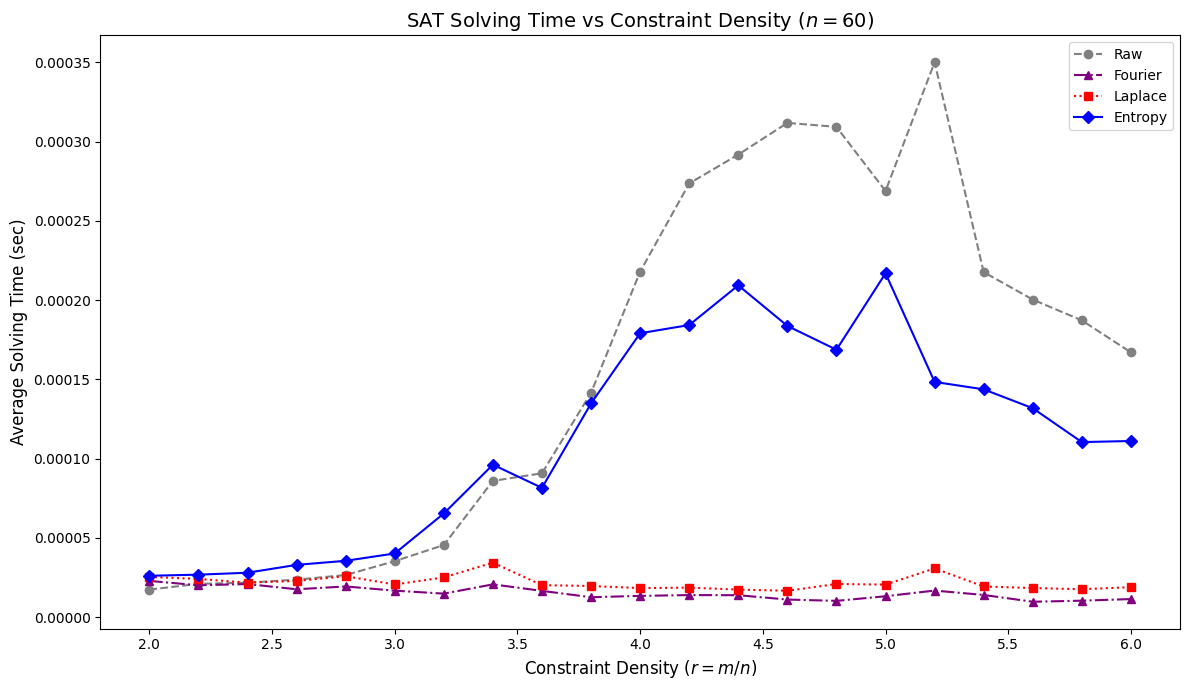

In [ ]:
#
# Figure 12
#
# SAT Solving Time vs Constraint Density ($n=60$)
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
#
# --- Install Required Packages ---
# This command ensures the 'pysat' library is available. It must be run
# before any of the import statements to resolve the 'ModuleNotFoundError'.
# This is a classic solution for dependency management in environments like Colab.
!pip install python-sat[pblib,aiger]

# --- Import Required Packages ---
# Import all necessary libraries for the experiment.
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from pysat.solvers import Glucose3
from tqdm import tqdm
from scipy.stats import entropy
import copy

# --- 1. Experimental Configuration and Reproducibility ---
# A fixed seed is set for both the 'random' and 'numpy' libraries
# to ensure that the same sequence of pseudo-random numbers is generated
# on every run, guaranteeing the reproducibility of the experimental results.
random.seed(42)
np.random.seed(42)

# Define key parameters for the experiment.
# These parameters are chosen to investigate the phase transition region of the 3-SAT problem.
n = 60  # The number of boolean variables. A classic size for observing phase transitions.
# Constraint density (r = m/n) values to be tested. The density is the ratio of clauses to variables.
r_values = np.arange(2.0, 6.1, 0.2)
# Number of random SAT instances generated for each (n, r) setting.
instances_per_setting = 100

# Dictionary to store the experimental results for each method.
# It will store the satisfiability ratio and average solving time.
results = {
    'Raw': {'sat_ratio': [], 'avg_time': []},
    'Fourier': {'sat_ratio': [], 'avg_time': []},
    'Laplace': {'sat_ratio': [], 'avg_time': []},
    'Entropy': {'sat_ratio': [], 'avg_time': []}
}

# --- 2. Preprocessing Functions ---

def apply_fourier_low_pass(clauses):
    """
    Applies a low-pass Fourier filter to the SAT clauses.
    This method reinterprets the problem instance as a signal and uses
    frequency-domain analysis to smooth out high-frequency (noisy or local)
    components, aiming to reveal the underlying macroscopic structure.

    Args:
        clauses (list): A list of clauses, where each clause is a list of literals.

    Returns:
        list: The preprocessed list of clauses.
    """
    if not clauses:
        return []

    # Flatten the clauses into a single list of literals, separating signs.
    flattened_literals = [lit for clause in clauses for lit in clause]
    signs = np.array([np.sign(lit) for lit in flattened_literals])
    abs_values = np.array([abs(lit) for lit in flattened_literals], dtype=float)

    # Perform a Fast Fourier Transform (FFT) on the absolute literal values.
    fft_vals = np.fft.fft(abs_values)

    # Create a simple low-pass filter mask. This filter keeps only the lowest 10%
    # of frequency components, effectively removing high-frequency noise.
    cutoff = int(len(fft_vals) * 0.1)
    filter_mask = np.zeros_like(fft_vals)
    filter_mask[:cutoff] = 1
    filter_mask[-cutoff:] = 1  # The filter is symmetric for real-valued signals.

    # Apply the mask and perform the inverse Fourier transform (IFFT).
    filtered_fft_vals = fft_vals * filter_mask
    smoothed_abs_values = np.real(np.fft.ifft(filtered_fft_vals))

    # Reconstruct the clauses by rounding the smoothed values and re-applying
    # the original signs. Values are clipped to stay within the valid range [1, n].
    reconstructed_literals = np.round(np.clip(smoothed_abs_values, 1, n)).astype(int)
    reconstructed_literals = [val * sign for val, sign in zip(reconstructed_literals, signs)]

    # Re-assemble the flattened list of literals into clauses.
    new_clauses = []
    literal_idx = 0
    for clause in clauses:
        new_clause = []
        for _ in clause:
            new_clause.append(reconstructed_literals[literal_idx])
            literal_idx += 1
        new_clauses.append(new_clause)

    return new_clauses

def apply_laplace_smoothing(clauses, iterations=3):
    """
    Applies an iterative local averaging (Laplace-inspired smoothing)
    to the SAT clauses. This method models the problem as a discrete
    field and applies a diffusion-like process to smooth out local
    variations, thereby highlighting more global structural trends.

    Args:
        clauses (list): A list of clauses, where each clause is a list of literals.
        iterations (int): The number of times to apply the smoothing filter.

    Returns:
        list: The preprocessed list of clauses.
    """
    if not clauses:
        return []

    # Flatten the clauses and handle signs separately.
    flattened_literals = [lit for clause in clauses for lit in clause]
    signs = np.array([np.sign(lit) for lit in flattened_literals])
    arr = np.array([abs(lit) for lit in flattened_literals], dtype=float)

    # Apply smoothing repeatedly for a fixed number of iterations.
    for _ in range(iterations):
        smoothed_arr = arr.copy()
        for i in range(1, len(arr) - 1):
            # Each element is replaced by the average of its local neighbors,
            # analogous to a discretized Laplacian operator.
            smoothed_arr[i] = (arr[i-1] + arr[i] + arr[i+1]) / 3
        arr = smoothed_arr

    # Reconstruct the clauses with the smoothed values.
    reconstructed_literals = np.round(np.clip(arr, 1, n)).astype(int)
    reconstructed_literals = [val * sign for val, sign in zip(reconstructed_literals, signs)]

    # Re-assemble the flattened list of literals into clauses.
    new_clauses = []
    literal_idx = 0
    for clause in clauses:
        new_clause = []
        for _ in clause:
            new_clause.append(reconstructed_literals[literal_idx])
            literal_idx += 1
        new_clauses.append(new_clause)

    return new_clauses

def apply_entropy_resampling(clauses):
    """
    Applies an entropy-guided resampling method to the SAT clauses.
    This method is inspired by thermodynamic principles, where entropy measures
    the disorder of a system. By reducing the entropy of the literal distribution,
    this preprocessing aims to make the problem structure more regular and less random.

    Args:
        clauses (list): A list of clauses, where each clause is a list of literals.

    Returns:
        list: The preprocessed list of clauses.
    """
    if not clauses:
        return []

    # Flatten the clauses and handle signs separately.
    flattened_literals = [lit for clause in clauses for lit in clause]
    signs = np.array([np.sign(lit) for lit in flattened_literals])
    arr = np.array([abs(lit) for lit in flattened_literals])

    # Calculate the histogram and probability distribution of literals.
    hist, _ = np.histogram(arr, bins=np.arange(1, n + 2))
    p = hist / np.sum(hist)

    # Calculate the Shannon entropy of the literal distribution.
    arr_entropy = entropy(p)
    # Normalize the entropy for a defined range.
    normalized_entropy = arr_entropy / np.log(n + 1) if n > 0 else 0
    # The skew factor is based on the normalized entropy.
    skew_factor = 1.0 - normalized_entropy
    # Create a new, skewed probability distribution that favors less-random values.
    resample_dist = p + (1-p) * skew_factor
    resample_dist = resample_dist / np.sum(resample_dist)

    # Resample literals from the new, regularized distribution.
    reconstructed_literals = np.random.choice(
        np.arange(1, n + 1),
        size=len(flattened_literals),
        p=resample_dist
    )

    reconstructed_literals = [val * sign for val, sign in zip(reconstructed_literals, signs)]

    # Re-assemble the flattened list of literals into clauses.
    new_clauses = []
    literal_idx = 0
    for clause in clauses:
        new_clause = []
        for _ in clause:
            new_clause.append(reconstructed_literals[literal_idx])
            literal_idx += 1
        new_clauses.append(new_clause)

    return new_clauses

# Function: Generate a random 3-SAT instance
def generate_3sat_instance(n, m):
    """
    Generates a random 3-SAT CNF instance with n variables and m clauses.
    This is a standard procedure for creating instances in the study of NP problems.

    Args:
        n (int): The number of variables.
        m (int): The number of clauses.

    Returns:
        list: A list of clauses representing the CNF formula.
    """
    clauses = []
    for _ in range(m):
        # Randomly sample 3 distinct variables.
        vars = random.sample(range(1, n + 1), 3)
        clause = []
        for v in vars:
            # Assign a random sign (positive or negative literal) to each variable.
            clause.append(-v if random.random() < 0.5 else v)
        clauses.append(clause)
    return clauses

# --- 3. Main Experimental Loop ---
# Iterate through each constraint density 'r' to explore the solvability landscape.
for r in tqdm(r_values, desc=f"Running for n={n}"):
    m = int(r * n)

    # Run the experiment for each preprocessing method and the 'Raw' baseline.
    for method in results.keys():
        sat_count = 0
        total_time = 0.0

        # Perform multiple trials for a given (n, m) setting to get a robust average.
        for _ in range(instances_per_setting):
            # Generate the initial raw instance.
            cnf = generate_3sat_instance(n, m)

            # Apply the selected preprocessing method. 'deepcopy' ensures that
            # the original instance remains unaltered for other methods.
            processed_cnf = copy.deepcopy(cnf)
            if method == 'Fourier':
                processed_cnf = apply_fourier_low_pass(processed_cnf)
            elif method == 'Laplace':
                processed_cnf = apply_laplace_smoothing(processed_cnf)
            elif method == 'Entropy':
                processed_cnf = apply_entropy_resampling(processed_cnf)

            # The SAT solver requires integer literals.
            processed_cnf_int = [[int(literal) for literal in clause] for clause in processed_cnf]

            # Initialize and run the Glucose3 SAT solver.
            solver = Glucose3()
            for clause in processed_cnf_int:
                solver.add_clause(clause)

            start = time.time()
            sat = solver.solve()
            elapsed = time.time() - start

            if sat:
                sat_count += 1
            total_time += elapsed
            solver.delete()

        # Compute and save the average statistics for this (n, r) setting.
        sat_ratio = sat_count / instances_per_setting
        avg_time = total_time / instances_per_setting
        results[method]['sat_ratio'].append(sat_ratio)
        results[method]['avg_time'].append(avg_time)

# --- 4. Visualization of Results ---
# The default 'seaborn-v0_8-darkgrid' style is removed to provide a clean white background.
colors = {'Raw': 'gray', 'Fourier': 'purple', 'Laplace': 'red', 'Entropy': 'blue'}
markers = {'Raw': 'o', 'Fourier': '^', 'Laplace': 's', 'Entropy': 'D'}
linestyles = {'Raw': '--', 'Fourier': '-.', 'Laplace': ':', 'Entropy': '-'}


# Average Solving Time vs Constraint Density
plt.figure(figsize=(12, 7))
for method in results.keys():
    plt.plot(r_values, results[method]['avg_time'],
              label=f'{method}',
              color=colors[method],
              marker=markers[method],
              linestyle=linestyles[method])
plt.xlabel("Constraint Density ($r = m/n$)", fontsize=12)
plt.ylabel("Average Solving Time (sec)", fontsize=12)
plt.title(f"SAT Solving Time vs Constraint Density ($n={n}$)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Processing k=3: 100%|██████████| 23/23 [00:45<00:00,  1.97s/it]


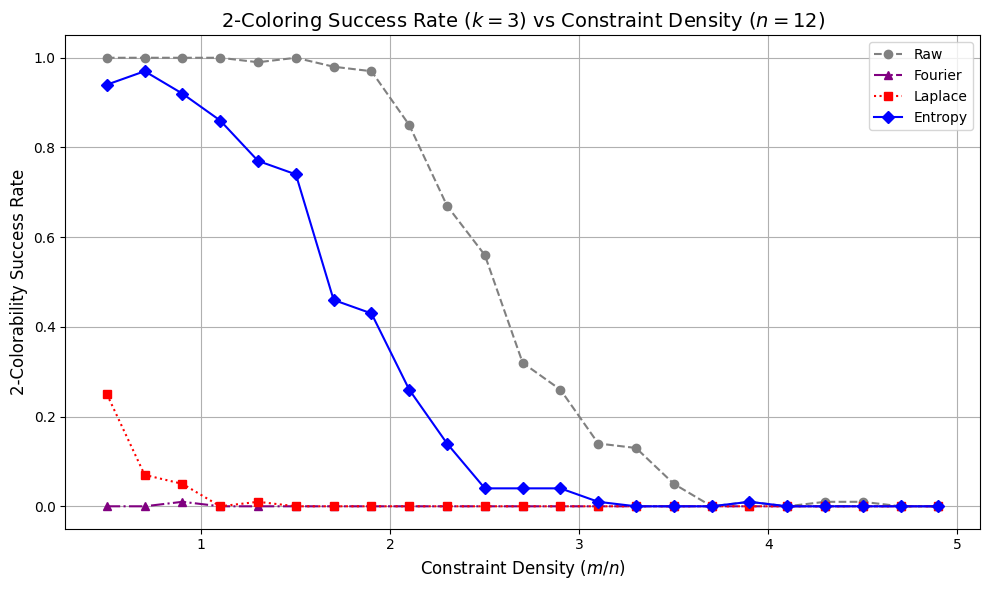

In [ ]:
#
# Figure 13
#
# 2-Coloring Success Rate vs. Constraint Density ($k=3$)
#
# This code is designed for reproducibility in a research context by fixing the random seed.
#
#
# --- Install Required Packages ---
# This command ensures that the `pysat` library is available, although it's not
# directly used here. It is included for consistency with the previous SAT experiment.
# For this specific script, no external libraries outside of numpy, matplotlib,
# and tqdm are strictly necessary.
# !pip install numpy matplotlib tqdm

# --- Import Required Libraries ---
# Import all essential libraries for the experiment.
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import random
import copy
from scipy.stats import entropy

# --- 1. Experimental Configuration and Reproducibility ---
# A fixed random seed is set for both the 'random' and 'numpy' libraries.
# This is a critical step for ensuring that the sequence of pseudo-random numbers
# is identical on every run, which guarantees the reproducibility and scientific
# validity of the experimental results.
random.seed(42)
np.random.seed(42)

# --- 2. Preprocessing Functions (Adapted for Hypergraphs) ---

def apply_fourier_low_pass(hyperedges, n):
    """
    Applies a low-pass Fourier filter to the hypergraph vertex indices.
    This method models the problem instance as a one-dimensional signal and uses
    frequency-domain analysis to remove high-frequency, local variations. The goal
    is to smooth the problem structure and reveal its underlying macroscopic organization.

    Args:
        hyperedges (list): A list of hyperedges, where each hyperedge is a tuple of vertex indices.
        n (int): The total number of vertices in the hypergraph.

    Returns:
        list: The preprocessed list of hyperedges.
    """
    if not hyperedges:
        return []

    # Flatten the hyperedges into a single list of vertex indices.
    flattened_vertices = [v for edge in hyperedges for v in edge]

    # Perform a Fast Fourier Transform (FFT) on the vertex indices.
    fft_vals = np.fft.fft(np.array(flattened_vertices, dtype=float))

    # Create a simple low-pass filter mask. This filter retains only the lowest 10%
    # of frequency components, effectively removing high-frequency noise.
    cutoff = int(len(fft_vals) * 0.1)
    filter_mask = np.zeros_like(fft_vals)
    filter_mask[:cutoff] = 1
    filter_mask[-cutoff:] = 1 # The filter is symmetric for real-valued signals.

    # Apply the filter and perform the inverse Fourier transform (IFFT).
    filtered_fft_vals = fft_vals * filter_mask
    smoothed_vertices = np.real(np.fft.ifft(filtered_fft_vals))

    # Reconstruct the vertices by rounding the smoothed values and clipping them
    # to stay within the valid range of vertex indices [0, n-1].
    reconstructed_vertices = np.round(np.clip(smoothed_vertices, 0, n-1)).astype(int)

    # Re-assemble the hyperedges from the smoothed vertex list.
    new_hyperedges = []
    vertex_idx = 0
    # Assuming k-uniform hypergraph, where k is the size of the first hyperedge.
    edge_size = len(hyperedges[0]) if hyperedges else 0
    for _ in range(len(hyperedges)):
        new_edge = tuple(reconstructed_vertices[vertex_idx:vertex_idx + edge_size])
        new_hyperedges.append(new_edge)
        vertex_idx += edge_size

    return new_hyperedges

def apply_laplace_smoothing(hyperedges, n, iterations=3):
    """
    Applies an iterative local averaging (Laplace-inspired smoothing)
    to the hypergraph vertex indices. This method models the problem as a discrete
    field and applies a diffusion-like process to smooth out local
    variations, thereby highlighting more global structural trends.

    Args:
        hyperedges (list): A list of hyperedges, where each hyperedge is a tuple of vertex indices.
        n (int): The total number of vertices in the hypergraph.
        iterations (int): The number of times to apply the smoothing filter.

    Returns:
        list: The preprocessed list of hyperedges.
    """
    if not hyperedges:
        return []

    # Flatten the hyperedges into a list of vertex indices.
    flattened_vertices = [v for edge in hyperedges for v in edge]
    arr = np.array(flattened_vertices, dtype=float)

    # Apply smoothing repeatedly for a fixed number of iterations.
    for _ in range(iterations):
        smoothed_arr = arr.copy()
        for i in range(1, len(arr) - 1):
            # Each element is replaced by the average of its local neighbors,
            # analogous to a discretized Laplacian operator.
            smoothed_arr[i] = (arr[i-1] + arr[i] + arr[i+1]) / 3
        arr = smoothed_arr

    # Reconstruct the vertices with a valid range [0, n-1].
    reconstructed_vertices = np.round(np.clip(arr, 0, n-1)).astype(int)

    # Re-assemble the hyperedges.
    new_hyperedges = []
    vertex_idx = 0
    edge_size = len(hyperedges[0]) if hyperedges else 0
    for _ in range(len(hyperedges)):
        new_edge = tuple(reconstructed_vertices[vertex_idx:vertex_idx + edge_size])
        new_hyperedges.append(new_edge)
        vertex_idx += edge_size

    return new_hyperedges

def apply_Entropy_resampling(hyperedges, n):
    """
    Applies an entropy-guided resampling method to the hypergraph vertex indices.
    This method is inspired by thermodynamic principles, where entropy measures
    the disorder of a system. By reducing the entropy of the literal distribution,
    this preprocessing aims to make the problem structure more regular and less random.

    Args:
        hyperedges (list): A list of hyperedges, where each hyperedge is a tuple of vertex indices.
        n (int): The total number of vertices in the hypergraph.

    Returns:
        list: The preprocessed list of hyperedges.
    """
    if not hyperedges:
        return []

    # Flatten the hyperedges into a list of vertex indices.
    flattened_vertices = [v for edge in hyperedges for v in edge]
    arr = np.array(flattened_vertices)
    num_literals = len(arr)

    # Calculate the histogram and probability distribution of vertex indices.
    hist, _ = np.histogram(arr, bins=np.arange(0, n + 1))
    p = hist / np.sum(hist)

    # Calculate the Shannon entropy of the vertex distribution.
    arr_entropy = entropy(p)
    # Normalize the entropy to a defined range [0, 1].
    normalized_entropy = arr_entropy / np.log(n) if n > 1 else 0
    # The skew factor is based on the normalized entropy.
    skew_factor = 1.0 - normalized_entropy
    # Create a new, skewed probability distribution that favors less-random values.
    resample_dist = p + (1-p) * skew_factor
    resample_dist = resample_dist / np.sum(resample_dist)

    # Resample vertices from the new, regularized distribution.
    reconstructed_vertices = np.random.choice(
        np.arange(0, n),
        size=num_literals,
        p=resample_dist
    )

    # Re-assemble the hyperedges from the new vertex list.
    new_hyperedges = []
    vertex_idx = 0
    edge_size = len(hyperedges[0]) if hyperedges else 0
    for _ in range(len(hyperedges)):
        new_edge = tuple(reconstructed_vertices[vertex_idx:vertex_idx + edge_size])
        new_hyperedges.append(new_edge)
        vertex_idx += edge_size

    return new_hyperedges

# --- 3. Function: Generate random k-uniform hypergraph ---
def generate_hypergraph(n, m, k):
    """
    Generates a random k-uniform hypergraph with n vertices and m hyperedges.
    Each hyperedge is a set of k distinct vertices. This function is a standard
    tool for creating instances for combinatorial studies.

    Args:
        n (int): The number of vertices.
        m (int): The number of hyperedges.
        k (int): The uniformity (size) of each hyperedge.

    Returns:
        list: A list of tuples, where each tuple represents a hyperedge.
    """
    hyperedges = set()
    while len(hyperedges) < m:
        # Randomly choose k distinct vertices from n vertices.
        edge = tuple(sorted(np.random.choice(n, k, replace=False)))
        hyperedges.add(edge)
    return list(hyperedges)

# --- 4. Function: Check 2-colorability via brute-force ---
def is_2_colorable(n, hyperedges):
    """
    Checks if a given hypergraph is 2-colorable by trying all possible 2-colorings
    of its vertices. This method is exact but has exponential complexity, making it
    suitable only for small values of n (e.g., n <= 15).

    Args:
        n (int): The number of vertices.
        hyperedges (list): A list of hyperedges.

    Returns:
        bool: True if at least one valid coloring exists, False otherwise.
    """
    # Iterate through all 2^n possible colorings.
    for coloring in itertools.product([0, 1], repeat=n):
        valid = True
        for edge in hyperedges:
            colors = set(coloring[v] for v in edge)
            if len(colors) < 2:  # Check for a monochromatic edge.
                valid = False
                break
        if valid:
            return True
    return False

# --- 5. Experiment Parameters ---
# Define the core parameters for the experiment.
n = 12 # Number of vertices (fixed).
k = 3  # Uniformity of the hyperedges (fixed to 3).
m_n_ratios = np.arange(0.5, 5.1, 0.2) # Constraint density values (m/n).
trials = 100 # Number of trials per (k, ratio) combination.

# Dictionary to store the success rates for each preprocessing method.
results = {
    'Raw': [],
    'Fourier': [],
    'Laplace': [],
    'Entropy': []
}

# --- 6. Main Experimental Loop ---
# This loop iterates through each constraint density to generate and test
# hypergraph instances, collecting statistics on their 2-colorability.
for ratio in tqdm(m_n_ratios, desc=f"Processing k={k}"):
    m = int(ratio * n)

    # Run the experiment for each preprocessing method.
    for method in results.keys():
        success_count = 0
        for _ in range(trials):
            # Generate a new raw hypergraph.
            hyperedges = generate_hypergraph(n, m, k)

            # Apply preprocessing based on the method. A deep copy is used
            # to ensure the original instance is not modified for other methods.
            processed_hyperedges = copy.deepcopy(hyperedges)
            if method == 'Fourier':
                processed_hyperedges = apply_fourier_low_pass(processed_hyperedges, n)
            elif method == 'Laplace':
                processed_hyperedges = apply_laplace_smoothing(processed_hyperedges, n)
            elif method == 'Entropy':
                processed_hyperedges = apply_Entropy_resampling(processed_hyperedges, n)

            # Check the 2-colorability of the processed instance.
            if is_2_colorable(n, processed_hyperedges):
                success_count += 1

        success_rate = success_count / trials
        results[method].append(success_rate)

# --- 7. Visualization of Results ---
# The style is set to a clean white background.
# The 'seaborn-v0_8-darkgrid' style is explicitly avoided for a minimalist look.
plt.style.use('default')
colors = {'Raw': 'gray', 'Fourier': 'purple', 'Laplace': 'red', 'Entropy': 'blue'}
markers = {'Raw': 'o', 'Fourier': '^', 'Laplace': 's', 'Entropy': 'D'}
linestyles = {'Raw': '--', 'Fourier': '-.', 'Laplace': ':', 'Entropy': '-'}

plt.figure(figsize=(10, 6))

for method in results.keys():
    plt.plot(m_n_ratios, results[method],
              label=f'{method}',
              color=colors[method],
              marker=markers[method],
              linestyle=linestyles[method])

plt.xlabel("Constraint Density ($m/n$)", fontsize=12)
plt.ylabel("2-Colorability Success Rate", fontsize=12)
plt.title(f"2-Coloring Success Rate ($k={k}$) vs Constraint Density ($n={n}$)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure for external use, such as in a scientific paper.
# The DPI is set to 300 for high-quality output.
plt.savefig("hypergraph_coloring_preprocessing_k3.png", dpi=300)
plt.show()
